## Jupyter Notebook Assessment Task

### *Learn to analyse data with Pokémon!*

[Repository Link](https://github.com/TurnipGuy30/Jupyter)

This project covers the following:

- Taking data from a CSV file

- Cleaning and exporting data

- Analysing and visualising data

---

### Format

- Rich paragraphs explain each section in detail.

- Code comments use generic terms to describe each code block.

---

### Setup

The first thing we should do is set up the modules we plan to use in the program. These will be used to access our database and create diagrams from the data.

| Module | Purpose |
|:--|:--|
| `pandas` | Create and store `DataFrame`s |
| `pyplot` | Manipulate graphs |
| `seaborn` | Plot data into graphs |

In [1]:
# import modules
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [2]:
# update matplotlib configuration for later use
plt.rcParams.update(
	{
		'font.size': 20,
		'figure.figsize': (10, 8)
	}
)

---

### Importing a database

Now that the environment is set up, we can import our "in" file, which is located at `in/pokemon.csv`.

In [3]:
# read CSV file and save to variable as DataFrame
pokemon = pd.read_csv('in/pokemon.csv')

In [4]:
# output DataFrame as table
pokemon

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,Mega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,Hoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,Hoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


---

### Summary of the database

We can see that the database is now outputting to the screen.

Running `pokemon` shows us just the start and the end of the file, but this already tells us a few things about the formatting of the data that are specific to a Pokémon database:

- Some Pokémon have alternate forms with the same Pokédex number, or `Number`.

Of course, these entries have different `index` values.

Looking at the original `pokemon.sql` file, the `PRIMARY KEY` property is given to the `Name` column. In SQL, the Primary Key property is given to a column which the programmer knows will never have duplicate values.

Because this property was given to the `Name` column, we should set that column to our `index` column.

- Some Pokémon only have one type.

There are two columns for Pokémon types: `Type_1` and `Type_2`. This is because Pokémon can have either one or two types.

However, this means that some Pokémon will have `NaN` `Type_2` values. This shouldn't make a difference to our program.

It is worth noting that for Pokémon with two types, the first type is more heaviliy weighted when it comes to game calculations.

- Each Pokémon is grouped into a `Generation` category.

This database contains Pokémon up to Gen VI, meaning that each entry will have a `Generation` value of `1` through `6`.

- Each Pokémon has six different statistics.

Hit Points, Physical Attack, Physical Defense, Special Attack, Special Defense, and Speed are used in game calculations. In general, higher stats means a stronger Pokémon.

These stats are combined in the `Total` column.

Note: in the Pokémon community, the six stats are commonly abbreviated to `HP`, `ATK`, `DEF`, `SPA`, `SPD`, and `SPE`. These acronyms refer to the same statistics.

- Some Pokémon are `Legendary` Pokémon

Legendary Pokémon will generally have higher stats than non-Legendary Pokémon. We will explore this later on.

---

### Cleaning and organisation

Now that we better understand out data, we can start performing the required cleaning.

Let's rename the columns in accordance to the convention of the Pokémon community.

In [5]:
# rename columns by name
pokemon.rename(columns={
	'Number': 'Dex',
	'Attack': 'ATK',
	'Defense': 'DEF',
	'Sp_Atk': 'SPA',
	'Sp_Def': 'SPD',
	'Speed': 'SPE',
	'Generation': 'Gen'
}, inplace=True)

In [6]:
# make column names lowercase
pokemon.columns = [item.lower() for item in pokemon]

In [7]:
# set index column by name
pokemon.set_index('name', inplace=True)

Let's see how it's changed.

In [8]:
# output DataFrame as table
pokemon

,dex,type_1,type_2,total,hp,atk,def,spa,spd,spe,gen,legendary
name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
Mega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
Diancie,719,Rock,Fairy,600,50,100,150,100,150,50,6,True
Mega Diancie,719,Rock,Fairy,700,50,160,110,160,110,110,6,True
Hoopa Confined,720,Psychic,Ghost,600,80,110,60,150,130,70,6,True


Looking good! Let's move on.

---

### Empty data

It's always a good idea to check for empty data.

In [9]:
# show sum of NaN data
pokemon.isnull().sum()

dex            0
type_1         0
type_2       386
total          0
hp             0
atk            0
def            0
spa            0
spd            0
spe            0
gen            0
legendary      0
dtype: int64

We can see that the only column containing empty data is `type_2`. This is the expected result.

Now that the data is organised, we can export the file before moving on to visualisation.

In [10]:
# export DataFrame to file
pokemon.to_csv('out/pokemon.csv')

Note: this exported file can be found at `out/pokemon.csv`.

---

### Visualisation

Let's start visualising pieces of data.

Visualisation can help to point out certain parts of a database. Look at the following diagram.

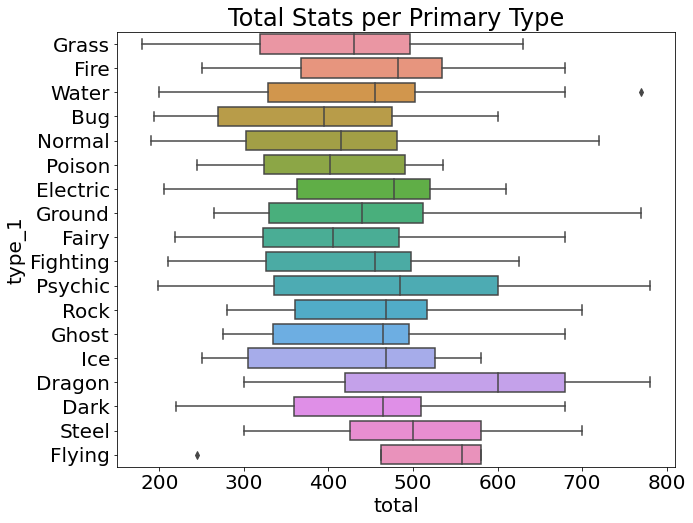

In [11]:
# boxplot by columns
sns.boxplot(x=pokemon['total'], y=pokemon['type_1']);
plt.title('Total Stats per Primary Type');

This can be useful information to Pokémon players who want to form the best team for Pokémon battles.

A Pokémon player could then use this information on top of their prior knowledge to form a team of strong Pokémon.

**I will now demonstrate this by doing it myself.** I will need to find and analyse relevant information.

Context:

- A Pokémon team is comprised of up to six individual Pokémon.

- Some Pokémon can Mega Evolve during battle. Mega Pokémon cannot exist outside of a battle, so any Mega Pokémon that are chosen will not be listed as Mega Pokémon on the team.

- This process will assume that the team cannot contain duplicate species, as is true in some competetive Pokémon battle rulesets.

---

### Attack and Defense

Correlation between Attack and Defense:

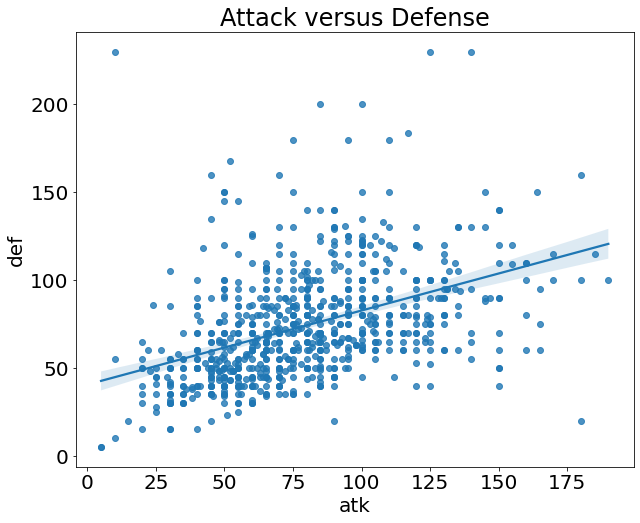

In [12]:
# correlation between columns
sns.regplot(x=pokemon['atk'], y=pokemon['def']);
plt.title('Attack versus Defense');

Correlation between Special Attack and Special Defense:

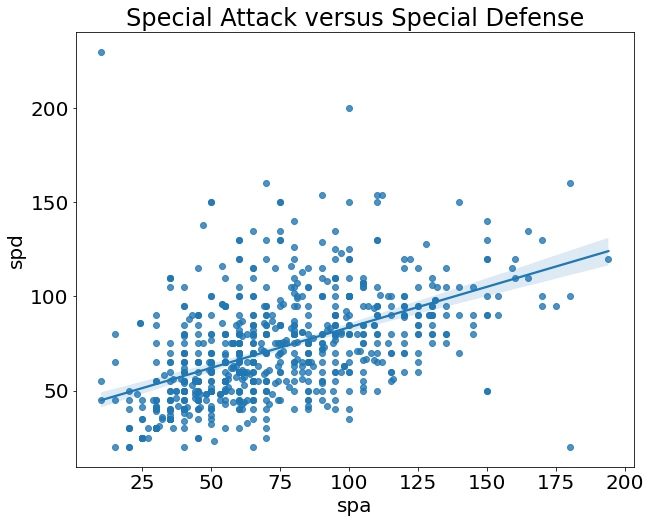

In [13]:
# correlation between columns
sns.regplot(x=pokemon['spa'], y=pokemon['spd']);
plt.title('Special Attack versus Special Defense');

These two diagrams show that the average Pokémon has higher Attack than Defense, and higher Special Attack than Special Defense. This means that high-Defense Pokémon are valuable to us.

---

### Physical and Special stats

Correlation between Attack and Special Attack:

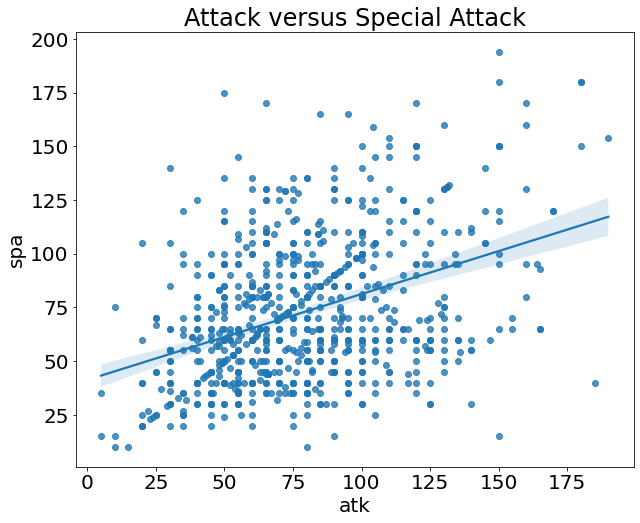

In [14]:
# correlation between columns
sns.regplot(x=pokemon['atk'], y=pokemon['spa']);
plt.title('Attack versus Special Attack');

Correlation between Defense and Special Defense:

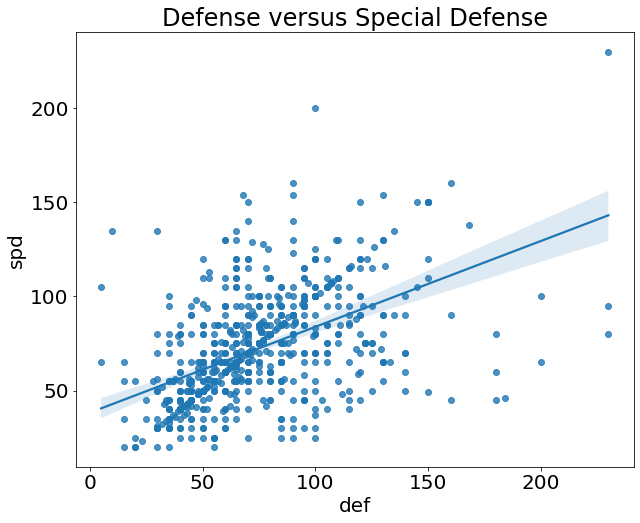

In [15]:
# correlation between columns
sns.regplot(x=pokemon['def'], y=pokemon['spd']);
plt.title('Defense versus Special Defense');

These diagrams show that the average Pokémon has higher Physical stats than Special stats.

---

### Hit Points

HP determines how long a Pokémon can stay in a battle before being defeated. We can look at HP in relation to types.

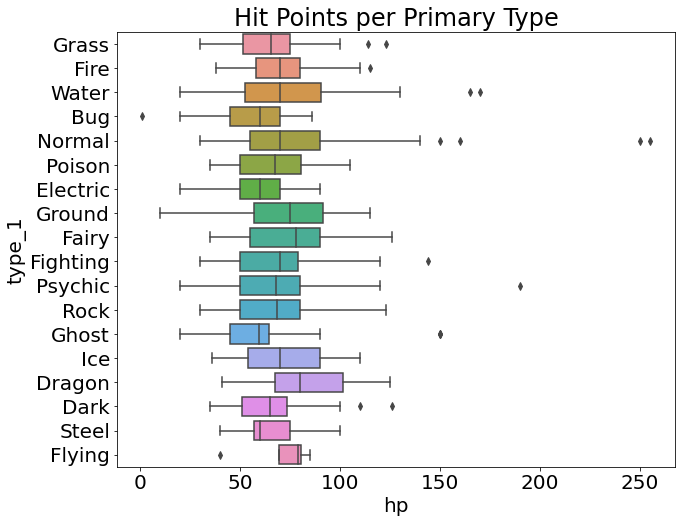

In [16]:
# boxplot by columns
sns.boxplot(x=pokemon['hp'], y=pokemon['type_1']);
plt.title('Hit Points per Primary Type');

When it comes to HP, there isn't much variation between the types. This means we won't have to worry too much about HP when choosing a Team. Anyway, other stats can compensate for low HP.

---

### Generations

It could be assumed that Pokémon from different Generations would generally have balanced stats, but we can confirm this graphically.

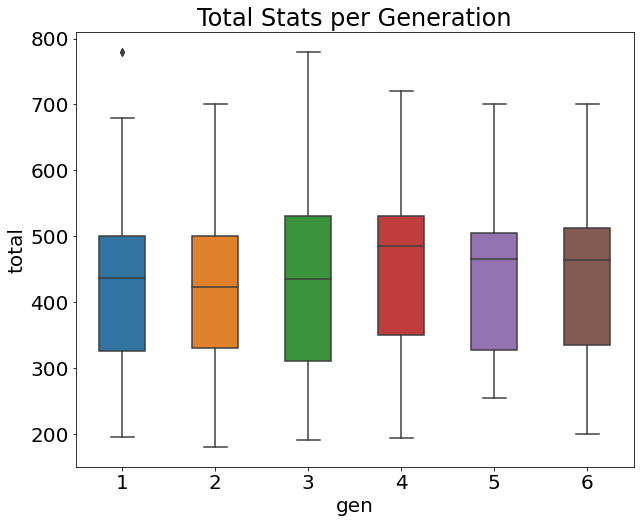

In [17]:
# boxplot by columns
sns.boxplot(x=pokemon['gen'], y=pokemon['total'], width=0.5);
plt.title('Total Stats per Generation');

---

### Type analysis

Because we know that high-Defense Pokémon are valuable, we should see which type has the best Defense stats. This will help in selecting members of our team.

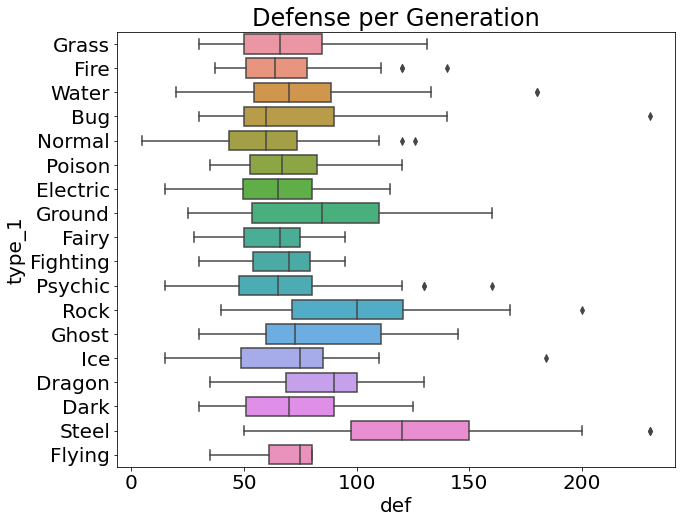

In [18]:
# compare columns
sns.boxplot(x=pokemon['def'], y=pokemon['type_1']);
plt.title('Defense per Generation');

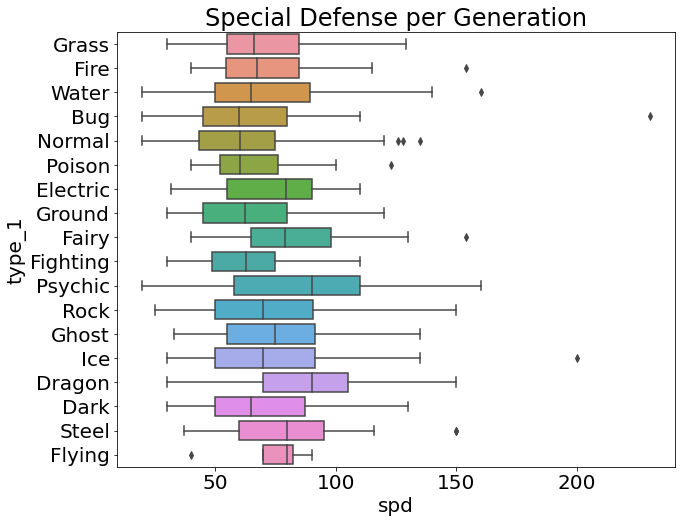

In [19]:
# compare columns
sns.boxplot(x=pokemon['spd'], y=pokemon['type_1']);
plt.title('Special Defense per Generation');

The results indicate that Ground-, Rock-, Steel-, Psychic-, and Dragon-types are among the best defenders. I'll store them in a `list` so we can easily search for them later.

In [20]:
# define list of strings
defenders = ['Ground', 'Rock', 'Steel', 'Psychic', 'Dragon']

---

### Secondary types

Now that we know what to look for in primary types, we can turn our attention to secondary types.

Another valuable statistic is Speed; it decides which Pokémon can attack first, and controls other game mechanics that aren't relevant to this project.

We'll look for Speed in relation to secondary types.

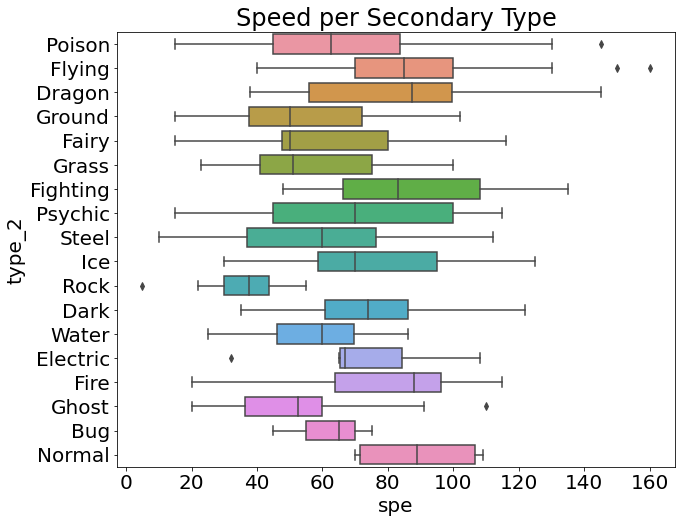

In [21]:
# boxplot by columns
sns.boxplot(x=pokemon['spe'], y=pokemon['type_2']);
plt.title('Speed per Secondary Type');

---

### Legendary Pokémon

Look at the diagram below.

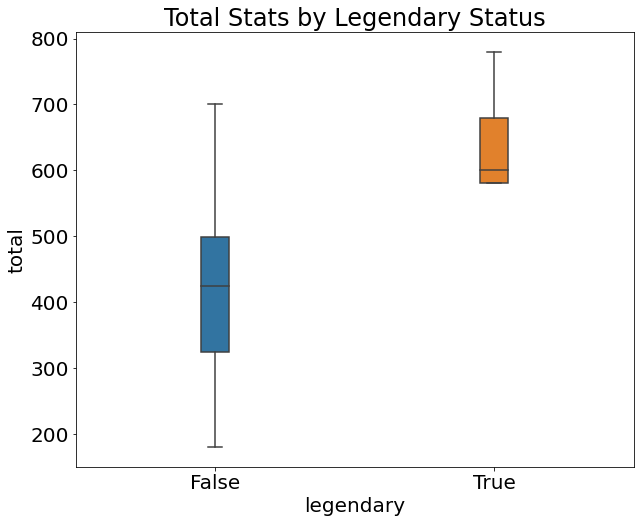

In [22]:
# boxplot by columns
sns.boxplot(x=pokemon['legendary'], y=pokemon['total'], width=0.1);
plt.title('Total Stats by Legendary Status');

This diagram shows the total stats of Legendary Pokémon compared to non-Legendary Pokémon. This means that if we want a team with the highest stats, we should generally use as many Legendary Pokémon as possible.

---

### Building a team

Let's create an array to store our team so we can easily call them later.

In [23]:
# define empty array
party = []

I will now search for Pokémon in accordance to the types we have found to be generally stronger.

In [24]:
# filter DataFrame by many conditions, sort, and output
pokemon[
	(pokemon['type_1'].isin(defenders)) &
	(pokemon['type_2'] == 'Dragon') &
	(pokemon['spe'] >= 80)
].sort_values('total', ascending=False).head(1)

,dex,type_1,type_2,total,hp,atk,def,spa,spd,spe,gen,legendary
name,,,,,,,,,,,,
Dialga,483,Steel,Dragon,680,100,120,120,150,100,90,4,True


According to this search, our best choice is Dialga; let's add it to the party.

In [25]:
# append string to array (turns array into list)
party.append('Dialga')

Let's find some more high-Defense Pokémon.

In [26]:
# filter DataFrame by many conditions and output
pokemon[
	(pokemon['type_1'].isin(defenders)) &
	(
		(
			(pokemon['atk'] >= 175) &
			(pokemon['def'] >= 100)
		) |
		(
			(pokemon['spa'] >= 175) &
			(pokemon['spd'] >= 100)
		)
	)
]

,dex,type_1,type_2,total,hp,atk,def,spa,spd,spe,gen,legendary
name,,,,,,,,,,,,
Mega Mewtwo X,150,Psychic,Fighting,780,106,190,100,154,100,130,1,True
Mega Mewtwo Y,150,Psychic,NaN,780,106,150,70,194,120,140,1,True
Primal Groudon,383,Ground,Fire,770,100,180,160,150,90,90,3,True
Mega Rayquaza,384,Dragon,Flying,780,105,180,100,180,100,115,3,True


This selection has a variety of types, which is exactly what we want. Let's add them to the team.

In [27]:
# append multiple strings to list
party.append('Mewtwo')
party.append('Groudon')
party.append('Rayquaza')

That brings our team to four Pokémon. Let's see which types we have.

In [28]:
# locate multiple entries
pokemon.loc[party]

,dex,type_1,type_2,total,hp,atk,def,spa,spd,spe,gen,legendary
name,,,,,,,,,,,,
Dialga,483,Steel,Dragon,680,100,120,120,150,100,90,4,True
Mewtwo,150,Psychic,NaN,680,106,110,90,154,90,130,1,True
Groudon,383,Ground,NaN,670,100,150,140,100,90,90,3,True
Rayquaza,384,Dragon,Flying,680,105,150,90,150,90,95,3,True


This team currently has only a few weaknessess: Ice, Ghost, Dragon, Dark, and Fairy-Types. Our last two spots can attempt to negate these.

In [29]:
# filter DataFrame by many conditions, sort, and output
pokemon[
	(pokemon['type_1'] == 'Fairy') |
	(
		(pokemon['type_1'] == 'Ice') &
		(pokemon['type_2'] == 'Ghost')
	)
].sort_values('spe', ascending=False).head(2)

,dex,type_1,type_2,total,hp,atk,def,spa,spd,spe,gen,legendary
name,,,,,,,,,,,,
Froslass,478,Ice,Ghost,480,70,80,70,80,70,110,4,False
Xerneas,716,Fairy,NaN,680,126,131,95,131,98,99,6,True


I'll add these two.

In [30]:
# append multiple strings to array
party.append('Froslass')
party.append('Xerneas')

Now, I'll create a chart of our team's strengths and weaknessess. Instead of automating the task with a complex command and another database, I'll just create the table myself.

Note: doing this efficiently requires much prior knowledge in type relationships.

In [31]:
# display DataFrame from dictionary
pd.DataFrame(
	{
		'Dialga': ['0.5x', '', '0.5x', '0.5x', '0.25x', '', '2x', '0x', '2x', '0.5x', '0.5x', '0.5x', '0.5x', '', '', '', '0.5x', ''],
		'Mewtwo': ['', '', '', '', '', '', '0.5x', '', '', '', '0.5x', '2x', '', '2x', '', '2x', '', ''],
		'Groudon': ['', '', '2x', '0x', '2x', '2x', '', '0.5x', '', '', '', '', '0.5x', '', '', '', '', ''],
		'Rayquaza': ['', '0.5x', '0.5x', '', '0.25x', '4x', '0.5x', '', '0x', '', '', '0.5x', '2x', '', '2x', '', '', '2x'],
		'Xerneas': ['', '', '', '', '', '', '0.5x', '2x', '', '', '', '0.5x', '', '', '0x', '0.5x', '2x', ''],
		'Froslass': ['0x', '2x', '', '', '', '0.5x', '0x', '0.5x', '', '', '', '0.5x', '2x', '2x', '', '2x', '2x', ''],
		'Total Weak': [0, 1, 1, 0, 1, 2, 1, 1, 1, 0, 0, 1, 2, 2, 1, 2, 2, 1],
		'Total Resist': [2, 1, 2, 2, 2, 1, 4, 3, 1, 1, 2, 4, 2, 0, 1, 1, 1, 0]
	}, index=['Normal', 'Fire', 'Water', 'Electric', 'Grass', 'Ice', 'Fighting', 'Poison', 'Ground', 'Flying', 'Psychic', 'Bug', 'Rock', 'Ghost', 'Dragon', 'Dark', 'Steel', 'Fairy']
)

,Dialga,Mewtwo,Groudon,Rayquaza,Xerneas,Froslass,Total Weak,Total Resist
Normal,0.5x,,,,,0x,0,2
Fire,,,,0.5x,,2x,1,1
Water,0.5x,,2x,0.5x,,,1,2
Electric,0.5x,,0x,,,,0,2
Grass,0.25x,,2x,0.25x,,,1,2
Ice,,,2x,4x,,0.5x,2,1
Fighting,2x,0.5x,,0.5x,0.5x,0x,1,4
Poison,0x,,0.5x,,2x,0.5x,1,3
Ground,2x,,,0x,,,1,1
Flying,0.5x,,,,,,0,1


This table shows how different types of attacks will be recieved by each Pokémon in the team. For example, an Ice-type move would do quadruple damage to Rayquaza, but we have Froslass' resistance to cover for it.

If we were using Rayquaza in a battle and came across an Ice-type Pokémon, we could switch to Froslass and use a Fire-, Fighting-, Rock-, or Steel-type attack. This is how Pokémon cover for each other in battles.

The only types this team has no resistance to are Ghost and Fairy, but in a real situation, these kinds of issues are neutralised by a Pokémon's moveset, namely Poison/Steel for Fairy, and Ghost/Dark for Ghost. These moves would be used by Dialga, Groudon, or Froslass, who are neither weak to nor strong against Fairy or Ghost.

It is also worth noting that the team is most resistant to Bug-, Fighting-, and Poison-type Pokémon.

Our final team looks like this.

In [32]:
pokemon.loc[party]

,dex,type_1,type_2,total,hp,atk,def,spa,spd,spe,gen,legendary
name,,,,,,,,,,,,
Dialga,483,Steel,Dragon,680,100,120,120,150,100,90,4,True
Mewtwo,150,Psychic,NaN,680,106,110,90,154,90,130,1,True
Groudon,383,Ground,NaN,670,100,150,140,100,90,90,3,True
Rayquaza,384,Dragon,Flying,680,105,150,90,150,90,95,3,True
Froslass,478,Ice,Ghost,480,70,80,70,80,70,110,4,False
Xerneas,716,Fairy,NaN,680,126,131,95,131,98,99,6,True


While there are likely possible improvements, this is a highly logical and straightforward method to create a team.

Practical Pokémon team creation relies on many aspects such as movesets, levels, and many more calculations that aren't relevant to this project. I think our results are a great starting point for competetive Pokémon battlers.

---

### Conclusion

In this project, we have used database visualisation to create a Pokémon team. This was just one example of practical data analysis.